# import libraries


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models


# Assign Path

In [2]:
d="/kaggle/input/garbage-classification/Garbage classification/Garbage classification"

In [3]:
classes=["cardboard","glass","metal","paper","plastic","trash"]

# Read data
Add data(image_path,class_name) into the list called "data"

In [4]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

# Preprocessing

Convert list(data) into array for shuffle the data so that model should not be able to learn any pattern from our data 

In [5]:
data=np.array(data)
import random
random.shuffle(data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


seprate list(data) into x(feature(image)) and y(class) list 

In [6]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

Convert x and y list into array because our model only process on array 

In [7]:
x=np.array(X)
y=np.array(Y)

x.shape=(2527, 224, 224, 3)
*   2527= images 
*   224=height
*   224=width
*   3=rgb(red, green , blue)



In [8]:
print(x.shape,y.shape)

(2527, 224, 224, 3) (2527,)


Split data into train and test
* x=images data
* y=class labels
* test_size=40%
* random_state=Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
* stratify= data is split in a stratified fashion, using this as the class labels.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)

# Normalizing the training data

In [10]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [11]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


# Now we’ll train our deep learning model using transfer learning

# Build Mobilenet v2 for garbage classification

In [12]:
m=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

14536120/14536120 [==============================] - 0s 0us/step


In [13]:
m.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [14]:
base_input=m.layers[0].input
base_output=m.layers[-2].output

The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold. Here we’re using relu as activation function.

In [15]:
final_output = layers.Dense(128)(base_output) 
final_output = layers.Activation('relu')(final_output) 
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) 

# create new model by giving the base_input and final_output

In [16]:
new_model = tf.keras.Model(inputs = base_input, outputs = final_output)

# compiled model to train
Optimizer=Stochastic Gradient Descent (SGD)

In [17]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

# Trains the model for 30 number of epochs.

In [18]:
history=new_model.fit(x_train, y_train, epochs = 30,validation_data=(x_test, y_test))


Epoch 1/30
48/48 [==============================] - 24s 138ms/step - loss: 0.9004 - accuracy: 0.7084 - val_loss: 1.3200 - val_accuracy: 0.4491
Epoch 2/30
48/48 [==============================] - 5s 96ms/step - loss: 0.3499 - accuracy: 0.8997 - val_loss: 1.1947 - val_accuracy: 0.5430
Epoch 3/30
48/48 [==============================] - 5s 107ms/step - loss: 0.1762 - accuracy: 0.9532 - val_loss: 1.2199 - val_accuracy: 0.5134
Epoch 4/30
48/48 [==============================] - 5s 107ms/step - loss: 0.0984 - accuracy: 0.9782 - val_loss: 0.9729 - val_accuracy: 0.6597
Epoch 5/30
48/48 [==============================] - 5s 99ms/step - loss: 0.0659 - accuracy: 0.9914 - val_loss: 0.9525 - val_accuracy: 0.6746
Epoch 6/30
48/48 [==============================] - 5s 96ms/step - loss: 0.0425 - accuracy: 0.9954 - val_loss: 0.7033 - val_accuracy: 0.7794
Epoch 7/30
48/48 [==============================] - 5s 107ms/step - loss: 0.0285 - accuracy: 0.9974 - val_loss: 0.6952 - val_accuracy: 0.7685
Epoch 8/

# Evaluate the model

In [19]:
new_model.evaluate(x_test,y_test)

32/32 [==============================] - 1s 27ms/step - loss: 0.2304 - accuracy: 0.9308


[0.23043100535869598, 0.9307616353034973]

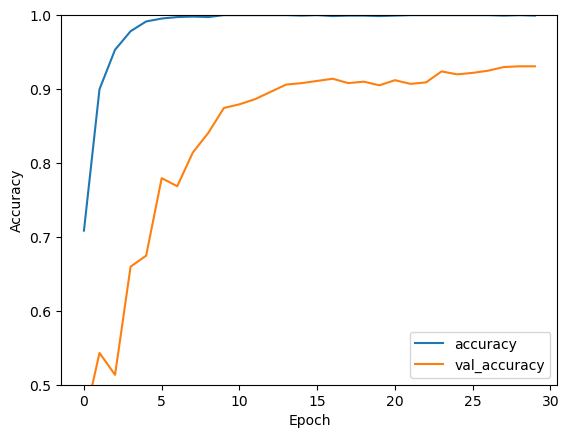

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

get predicted values and converted them into class label which is stored in x1

In [21]:
pred=new_model.predict(x_test)

32/32 [==============================] - 2s 23ms/step


In [22]:
x1=[]
for i in range(len(pred)):
    x1.insert(i,np.argmax(pred[i]))

In [23]:
x1=np.array(x1)
x1

array([0, 0, 0, ..., 0, 1, 0])

# Model Results comparison 

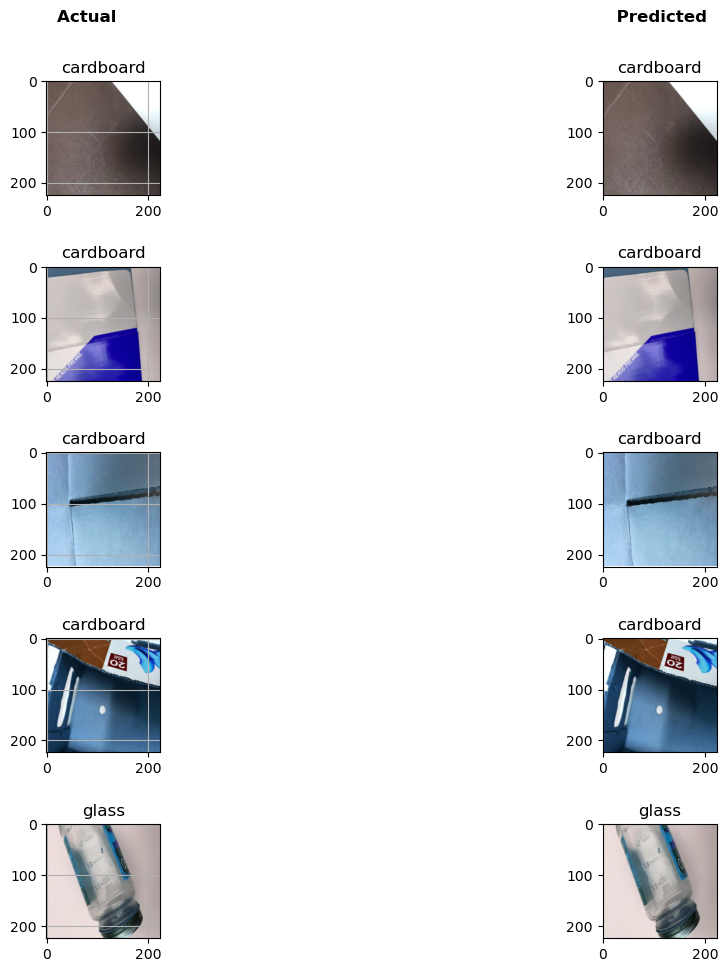

In [24]:
f, ax = plt.subplots(5,2,figsize=(15,10))
f.suptitle('Actual                                                                                       Predicted',
             fontsize = 12, fontweight ='bold')
a=0
b=1

for i in range(5):
    ax[i,a].imshow(x_test[i])
    ax[i,a].set_title(classes[y_test[i]])
    ax[i,b].imshow(x_test[i])
    ax[i,b].set_title(classes[x1[i]])
    ax[i,a].grid(True)
    ax[i,a].grid(True)


f.tight_layout(pad=2.0)
plt.show()